<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 06: Lab - LMS Algorithm - Statement </font></p>
</p></br>
</p>
</CENTER>


--------


# <span style="color:#00B8DE"> LMS equalization for digital data recovery </span>


> - 1  - Generate $n_s=10^4$ symbols of a BPSK modulation.
> - 2  - Convolve symbols with a filter with impulse response given by vector ${\bf h} \propto [1, .8, .3]$ and $\parallel {\bf h}\parallel = 1$. This filter represents the effect of propagation channel on transmitted symbols.
> - 3  - Add noise so as to achieve a fixed SNR at the receiver side. Plot the values of the first 20 symbols and that of the first 20 data samples as well as their sign for $SNR=20dB$. What do we note.
> - 4  - Check that even in the absence of noise the error probability $P_e$ resulting from decisions based on data thresholding would not be zero. Estimate the value of $P_e$ in the absence of equalization.
> - 5  - Implement an LMS filter with impulse response ${\bf w}$ of length $l_w=10$. The stepsize is set to half the maximum suggested stepsize and $SNR=20dB$.
> - 6  - plot the evolution of the distance $\parallel {\bf w}_{MSE}-{\bf w}_{LMS}\parallel $  between the $MSE$ estimate ${\bf w}_{MSE}$ of ${\bf w}$ and successsive LMS estimates $
{\bf w}_{LMS}$.
> - 7  - Study the convergence of the filter, depending on the SNR. 
> - 8  - Train the filter with $n_s=10^4$ symbols. Then generate data for $n_s=10^6$ symbols and $SNR=15dB$. Observe the histogram of data. Whate do you note?
> - 9  - deconvolve the sequence. Estimate the error probability $P_e$. Observe the histograms of equalizer output. remarks?
> - 10 - Analyze the influence of the different parameters (stepsize, SNR, impulse response ${\bf h}$, length of the training sequence, ...) on the behavior of the algorithm. 

## <span style="color:#00B8DE"> Data generation </span>

In [3]:
using LinearAlgebra: norm, tr
using Plots
pyplot()

Plots.PyPlotBackend()

In [46]:
using Pkg
Pkg.add("DSP")

 Resolving package versions...
 Installed Polynomials ─ v0.6.0
 Installed DSP ───────── v0.6.1
  Updating `~/.julia/environments/v1.2/Project.toml`
  [717857b8] + DSP v0.6.1
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [717857b8] + DSP v0.6.1
  [f27b6e38] + Polynomials v0.6.0


In [4]:
using Random

n = 10000
h = [1,0.8,0.3]
h = h/norm(h)
print(h)

signal = sign.(randn(n));

[0.7602859212697054, 0.6082287370157644, 0.22808577638091163]

In [48]:
using DSP
SNR = 20
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n)

10000-element Array{Float64,1}:
  0.6938310715949592 
  1.4398562420660024 
  1.6004860383960917 
  1.5917004091723272 
  1.6496185184785654 
  1.832504907002945  
  0.2136609607261961 
  0.2886646397325178 
  1.204910301903727  
  1.526564803795328  
  0.07245030781532863
 -1.2867724743115476 
  0.05479444563406499
  ⋮                  
  1.5859351618071507 
  1.6850326718191537 
  1.5908937505901364 
  1.4674555020678164 
  1.599213004844552  
  1.4834944892080628 
  1.7616256816955203 
  1.4761636420641793 
  1.538429625615437  
  0.1047129264838978 
 -1.2352775722112885 
 -0.17122728922459007

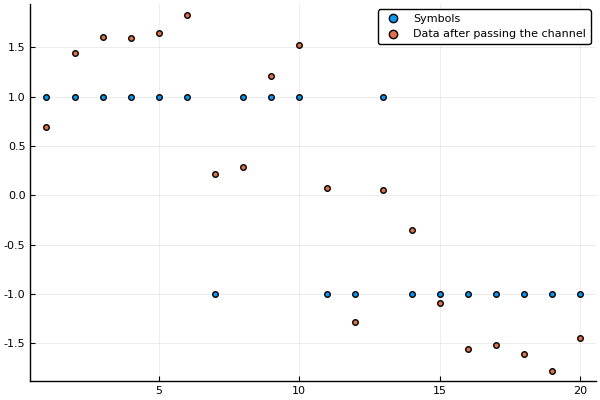

In [50]:
# Figures
scatter(signal[1:20],label="Symbols")
scatter!(y_n[1:20],label="Data after passing the channel")

In [59]:
#4
println("Pe without equalization = $(sum((abs.(y-signal)).>1)/n)")

Pe without equalization = 0.2506


## <span style="color:#00B8DE"> LMS filter </span>

In [11]:
using Pkg
Pkg.add("StatsBase")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [==================================>      ]  83.3 % Resolving package versions...
 Installed NaNMath ──────── v0.3.3
 Installed Calculus ─────── v0.5.1
 Installed Parsers ──────── v0.3.10
 Installed IterTools ────── v1.3.0
 Installed DataStructures ─ v0.17.6
 Installed GR ───────────── v0.44.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [2913bbd2] + StatsBase v0.32.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [49dc2e85] ↑ Calculus v0.5.0 ⇒ v0.5.1
  [864edb3b] ↑ DataStructures v0.17.5 ⇒ v0.17.6
  [28b8d3ca] ↑ GR v0.42.0 ⇒ v0.44.0
  [c8e1da08] ↑ IterTools v1.2.0 ⇒ v1.3.0
  [77ba4419] ↑ NaNMath v0.3.2 ⇒ v0.3.3
  [69de0a69] ↑ Parsers v0.3.8 ⇒ v0.3.10
  Building GR → `~/.julia/packages/GR/oiZD3/deps/build.log`


In [16]:
using Pkg
Pkg.add("ToeplitzMatrices")

 Resolving package versions...
 Installed ToeplitzMatrices ─ v0.6.0
 Installed AbstractFFTs ───── v0.5.0
 Installed FFTW ───────────── v1.1.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [c751599d] + ToeplitzMatrices v0.6.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [621f4979] + AbstractFFTs v0.5.0
  [7a1cc6ca] + FFTW v1.1.0
  [c751599d] + ToeplitzMatrices v0.6.0
  Building FFTW → `~/.julia/packages/FFTW/loJ3F/deps/build.log`


In [61]:
# MSE solution (min||w'.data-symb||)
#-----------------------------------
using StatsBase
using ToeplitzMatrices
lw=10
lang=zeros(lw)
for j=1:lw
    lang[j]=j-1
end
lang=convert(Array{Int64},lang)
H=autocov(y_n,lang)
V=crosscov(y_n,signal,lang)
T=convert(Array{Float64,2},Toeplitz(H,H));
w_mse=inv(T)*V;

In [62]:
w_mse

10-element Array{Float64,1}:
  1.2748131772337208   
 -0.9955319396709683   
  0.40819531175918566  
 -0.031404422759500186 
 -0.09331025847412962  
  0.08201557455585291  
 -0.03524584608956888  
  0.004728747733809805 
  0.004198712670253723 
 -0.0021803039320876932

In [82]:
xp = zeros(lw-1+n)
xp[lw:end]=y_n
e=zeros(n)
w_lms=zeros(lw)

for i=1:n
    data=zeros(lw)
    data=reverse(xp[i:i-1+lw]);
    
    mu = 1/tr(T)
    w_lms = w_lms -mu.*(data*(w_lms'*data-signal[i]))
    e[n]=norm(w_lms-w_mse)
end

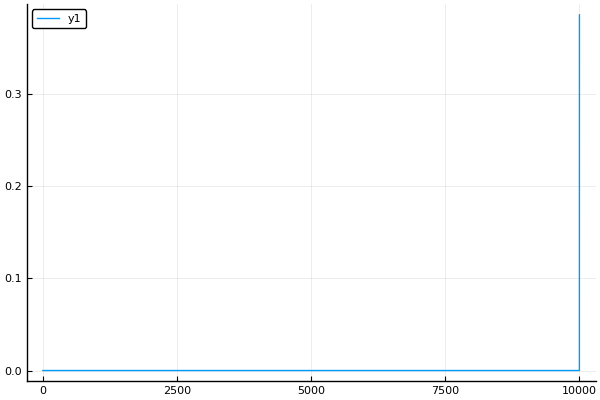

In [83]:
plot(e)

In [84]:
w_lms

10-element Array{Float64,1}:
  1.2612261890201608  
 -0.9138341628058089  
  0.253857667449345   
  0.22733781610973608 
 -0.1391197558313843  
  0.2582749912039811  
 -0.010478025889918197
  0.09457198116970386 
  0.06977012466586888 
  0.07234520582413696 

In [85]:
w_mse

10-element Array{Float64,1}:
  1.2748131772337208   
 -0.9955319396709683   
  0.40819531175918566  
 -0.031404422759500186 
 -0.09331025847412962  
  0.08201557455585291  
 -0.03524584608956888  
  0.004728747733809805 
  0.004198712670253723 
 -0.0021803039320876932

In [69]:
e = 0
for i=1:size(w_lms_list,2)
    e = [e sum(abs.(w_mse - w_lms_list[:,i]))]
end

In [70]:
plot(e)

InterruptException: InterruptException:

## <span style="color:#00B8DE"> Deconvolution </span>

[0.7602859212697054, 0.6082287370157644, 0.22808577638091163]

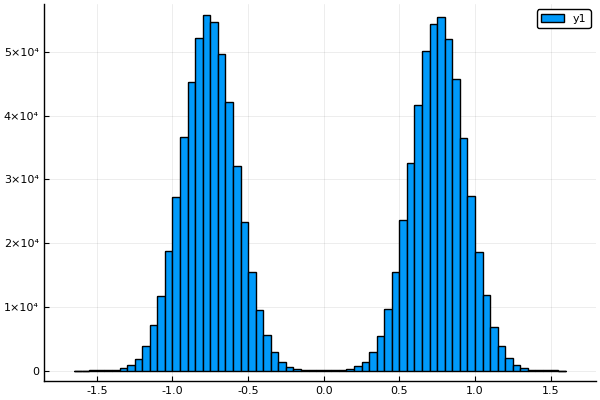

In [12]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 15
σ_n = 10^(-SNR/20)

y = convolution(signal,h)

y_n = y + σ_n*randn(n)

# data histogram

histogram(y_n)

In [66]:
# deconvolution
x_hat = conv(y_n,w_mse)[1:n]
println("Pe with equalization with the MSE coefficients = $(sum((abs.(x_hat[10:length(x_hat)]-signal[10:length(x_hat)])).>1)/n)")

Pe with equalization with the MSE coefficients = 0.0


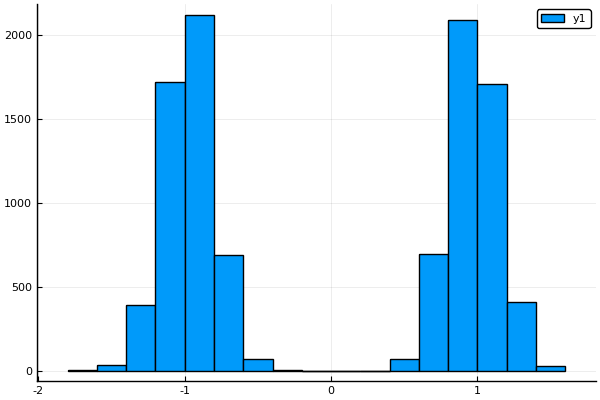

In [67]:
histogram(x_hat)

In [86]:
# deconvolution
x_hat = conv(y_n,w_lms)[1:n]
println("Pe with equalization = $(sum((abs.(x_hat[10:length(x_hat)]-signal[10:length(x_hat)])).>1)/n)")

Pe with equalization = 0.0066


In [20]:
# Dhistogram of equalizer outputs
...

LoadError: syntax: invalid identifier name "..."

In [21]:
# decisions
...

# Performance evaluation
...

LoadError: syntax: invalid identifier name "..."